Введите число вершин: 5


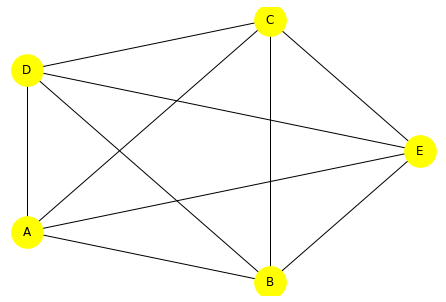

In [82]:
import itertools as it
import networkx as nx
import numpy.random as rnd
import matplotlib.pyplot as plt


rnd.seed(100)
kilometres = set()
n = int(input('Введите число вершин: '))
alphabet = [chr(i+65) for i in range(n)]
for i in it.product(alphabet, repeat=2):
    if i[0]!= i[1]:
        kilometres.add((i[0], i[1], rnd.randint(1, 100)))

graph = nx.Graph()


graph.add_weighted_edges_from(kilometres)

nx.draw_circular(graph,
         node_color='yellow',
         node_size=1000,
         with_labels=True)

### Функция для дальнейшей отрисовки графов

In [104]:
def print_graph(path):
    c = set([(path[i], path[i+1]) for i in range(len(path)-1)])
    graph_modif = nx.Graph()
    graph_modif.add_edges_from(c)
    nx.draw_circular(graph_modif,
         node_color='yellow',
         node_size=1000,
         with_labels=True)

### Реализация метода полного перебора:

(('E', 'A', 'B', 'D', 'C'), 71)


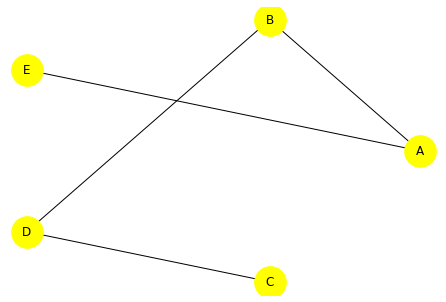

In [106]:
def complete_bust():
    a = [i for i in it.permutations(alphabet, n)]
    b = {}
    for i in a:
        k = 0
        summ = 0
        while k < n - 1:
            for j in kilometres:
                if i[k] == j[0] and i[k+1] == j[1]:
                    summ += j[2]
                    k += 1
                if k >= n-1:
                    break
        b[i] = summ

    list_d = list(b.items())
    list_d.sort(key=lambda i: i[1])

    print_graph(list_d[0][0])
    
    return list_d[0]


print(complete_bust())

### Метод ближайшего соседа

(['A', 'B', 'D', 'E', 'C'], 104)


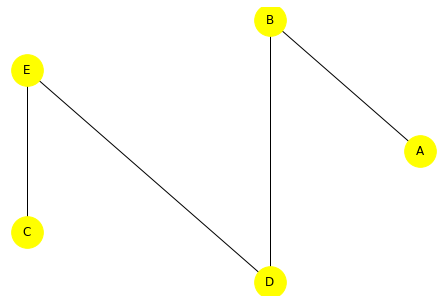

In [110]:
def nearest_neighbor(start='A'):
    length = 0
    path = [start]
    city = start
    
    def find_shortest(start):
        shortest = ('?', '?', float('inf'))
        for road in [road for road in kilometres if (road[0] == start and road[1] not in path)]:
            if road[2] < shortest[2]:
                shortest = road
        return shortest
    
    while len(path) < n:
        road = find_shortest(start)
        start = road[1]
        path.append(start)
        length += road[2]
    
    print_graph(path)
    
    return path, length

print(nearest_neighbor())